<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Augmentation/Analysis" data-toc-modified-id="Data-Augmentation/Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Augmentation/Analysis</a></span></li><li><span><a href="#Dataloader-creation-and-test" data-toc-modified-id="Dataloader-creation-and-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataloader creation and test</a></span></li><li><span><a href="#Model-creation" data-toc-modified-id="Model-creation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model creation</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Training</a></span><ul class="toc-item"><li><span><a href="#Model-Testing" data-toc-modified-id="Model-Testing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Testing</a></span></li></ul></li></ul></div>

**GET DATA**

Summary of this notebook: ...

Definition of Done: ...

# Imports


In [59]:
import os
import pickle
import sys
import glob
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import subprocess
sys.path.append("/home/satyarth934/code/FDL_2020/training_scripts")
import import_modules
import utils


In [60]:
DATA_PATH = "/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/*"
dims = (448,448,3)

In [61]:
img_paths = glob.glob(DATA_PATH)
print(len(img_paths))

365


  0%|          | 0/20 [00:00<?, ?it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010057.h16v07.006.2015199103742_nomedian.npy


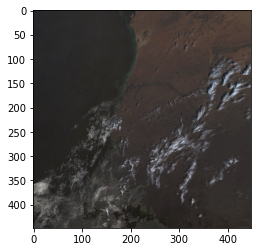

  5%|▌         | 1/20 [00:00<00:03,  5.85it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010290.h16v07.006.2015211210612_nomedian.npy


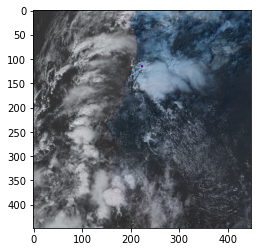

 10%|█         | 2/20 [00:00<00:03,  5.89it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010053.h16v07.006.2015199082048_nomedian.npy


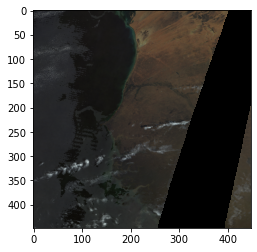

 15%|█▌        | 3/20 [00:00<00:02,  5.93it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010095.h16v07.006.2015206091949_nomedian.npy


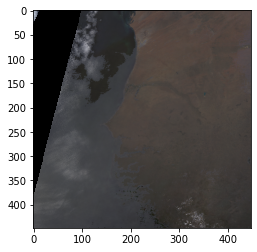

 20%|██        | 4/20 [00:00<00:02,  5.88it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010083.h16v07.006.2015205233106_nomedian.npy


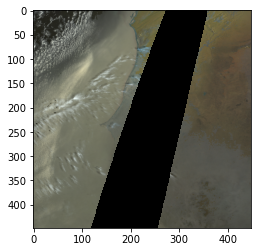

 25%|██▌       | 5/20 [00:00<00:02,  5.92it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010241.h16v07.006.2015210080024_nomedian.npy


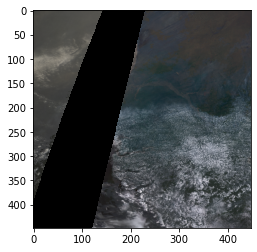

 30%|███       | 6/20 [00:01<00:02,  5.93it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010236.h16v07.006.2015210043938_nomedian.npy


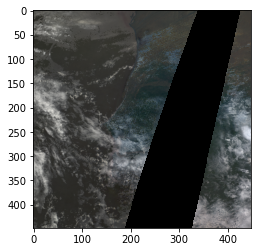

 35%|███▌      | 7/20 [00:01<00:03,  3.66it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010235.h16v07.006.2015210031624_nomedian.npy


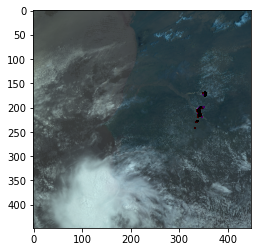

 40%|████      | 8/20 [00:01<00:02,  4.16it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010356.h16v07.006.2015213234518_nomedian.npy


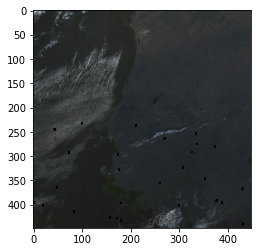

 45%|████▌     | 9/20 [00:01<00:02,  4.59it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010174.h16v07.006.2015208161406_nomedian.npy


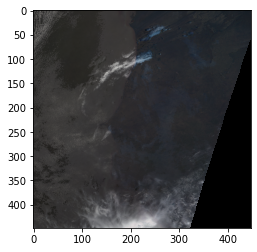

 50%|█████     | 10/20 [00:02<00:02,  4.95it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010022.h16v07.006.2015198123645_nomedian.npy


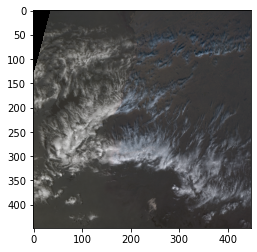

 55%|█████▌    | 11/20 [00:02<00:01,  5.28it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010126.h16v07.006.2015207161026_nomedian.npy


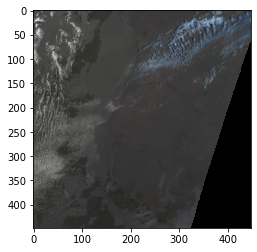

 60%|██████    | 12/20 [00:02<00:01,  5.57it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010117.h16v07.006.2015207082600_nomedian.npy


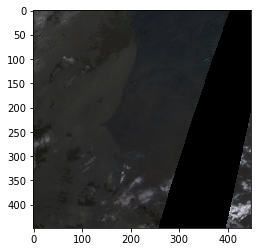

 65%|██████▌   | 13/20 [00:02<00:01,  5.79it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010286.h16v07.006.2015211080705_nomedian.npy


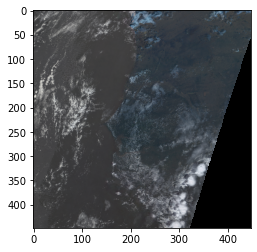

 70%|███████   | 14/20 [00:02<00:01,  5.94it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010336.h16v07.006.2015213120450_nomedian.npy


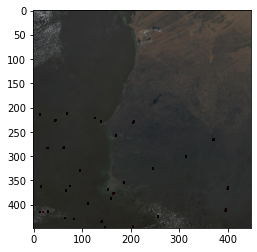

 75%|███████▌  | 15/20 [00:02<00:00,  5.98it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010281.h16v07.006.2015211055747_nomedian.npy


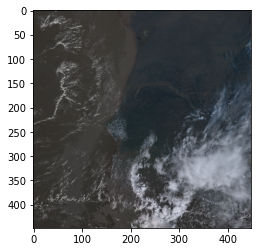

 80%|████████  | 16/20 [00:02<00:00,  6.03it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010010.h16v07.006.2015198043012_nomedian.npy


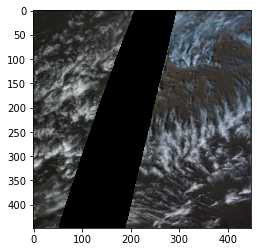

 85%|████████▌ | 17/20 [00:03<00:00,  6.14it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010353.h16v07.006.2015213203354_nomedian.npy


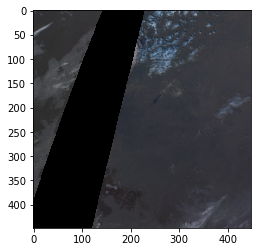

 90%|█████████ | 18/20 [00:03<00:00,  6.17it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010256.h16v07.006.2015210120730_nomedian.npy


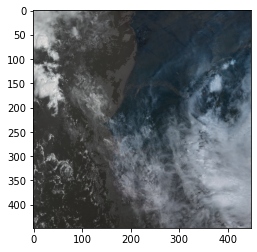

 95%|█████████▌| 19/20 [00:03<00:00,  6.20it/s]

/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010250.h16v07.006.2015210035556_nomedian.npy


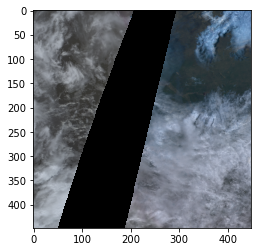

100%|██████████| 20/20 [00:03<00:00,  5.54it/s]


In [69]:
output_path = "/home/satyarth934/code/FDL_2020/report_images/median_removed"
for img_path in tqdm.tqdm(img_paths[10:30]):
    img = np.load(img_path)
    img = utils.normalize(img)
    print(img_path)
    plt.imshow(img)
    plt.show()

In [71]:
def getClosest(pt, options):
    x,y = pt
    min_val = -9999
    min_pt = options[0]
    for o in options:
        sse = np.sum(np.square(np.array(pt) - np.array(o)))
        if sse < min_val:
            min_val = se
            min_pt = o
    
    return min_pt

attempts: 2.5
attempts: 2.9612077584483103
attempts: 2.9784021597840216
attempts: 2.9800013332444504
attempts: 2.990750462476876
attempts: 3.001119955201792
attempts: 2.999150028332389
attempts: 2.9983714751007113
attempts: 3.0009749756256094
attempts: 2.9997333392591274
attempts: 8.0


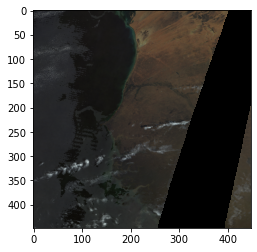

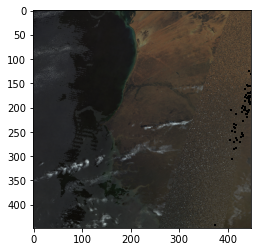

In [80]:
# img_path = "/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010250.h16v07.006.2015210035556_nomedian.npy"
# img_path = "/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010010.h16v07.006.2015198043012_nomedian.npy"
img_path = "/home/satyarth934/data/modis_data_products/terra/array_3bands_adapted/448/median_removed/448_MOD09GA.A2010053.h16v07.006.2015199082048_nomedian.npy"
image = np.load(img_path)
dims = (448, 448, 3)

N = 2
radius = 100

image = utils.normalize(image)
clone = np.copy(image)

for i in range(2):
    attempts = 0

    # local region
    (x,y,z) = np.where(np.isnan(clone))

    # nan value indices
    nan_idxs = [_ for _ in zip(x,y)]
    nan_idxs = list(set(nan_idxs))

    for i, item in enumerate(nan_idxs):
        x,y = item
        # region
        xtl, xtr = max(0, x - radius), min(image.shape[1], x + radius)
        ytl, ytr = max(0, y - radius), min(image.shape[1], y + radius)

        random_idxs = []
        counter = 0
        att2 = 0
        flag = 0
        while counter < N:
            if att2 > N * 10:
                flag = 1
                break
            att2 += 1

            attempts += 1
            random_idx = np.random.randint(xtl, xtr), np.random.randint(ytl, ytr)
            if np.sum(np.isnan(image[random_idx[0], random_idx[1],:])) > 0:
                continue
            random_idxs.append(random_idx)
            counter += 1

        if i%5000 == 0:
            print("attempts:", attempts / ((i+1) * N))

        if(flag==1):
            continue

        closest_x, closest_y = getClosest((x,y), random_idxs)
        clone[x,y,:] = image[closest_x,closest_y,:]


orig_path = "/home/satyarth934/code/FDL_2020/report_images/median_removed_gap_filled/orig_%s" % (os.path.basename(img_path))
plt.imshow(image)
plt.savefig(orig_path.replace(".npy", ".png"))
plt.savefig(orig_path.replace(".npy", ".eps"))
plt.show()

output_path = "/home/satyarth934/code/FDL_2020/report_images/median_removed_gap_filled/filled_%s" % (os.path.basename(img_path))
plt.imshow(clone)
plt.savefig(output_path.replace(".npy", ".png"))
plt.savefig(output_path.replace(".npy", ".eps"))
plt.show()